In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [79]:
mat = sio.loadmat('/Users/harangju/Developer/emp_bs2.mat')

/anaconda3/lib/python3.6/site-packages/scipy/io/matlab/mio.py:142: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [164]:
graphs = []
ns = mat['ns'][0]
for n in range(0,ns.size):
    A = ns[n]['A'][0][0]
    if len(A.shape) > 2:
        A = np.sum(A,axis=2)
    graphs.append(nx.DiGraph())
    for j in range(A.shape[1]):
        for i in range(A.shape[0]):
            if A[i,j] > 0.08:
                graphs[n].add_edge(j,i)

In [165]:
cycle_count = np.zeros(ns.size)
for n in range(0,ns.size):
    print('Network ' + str(n+1) + '/' + str(ns.size))
    cycle_gen = nx.simple_cycles(graphs[n])
    cycles = list(cycle_gen)
    cycle_count[n] = len(cycles)

Network 1/25
Network 2/25
Network 3/25
Network 4/25
Network 5/25
Network 6/25
Network 7/25
Network 8/25
Network 9/25
Network 10/25
Network 11/25
Network 12/25
Network 13/25
Network 14/25
Network 15/25
Network 16/25
Network 17/25
Network 18/25
Network 19/25
Network 20/25
Network 21/25
Network 22/25
Network 23/25
Network 24/25
Network 25/25


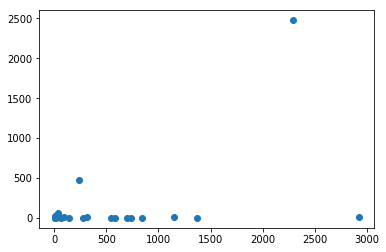

In [166]:
plt.scatter(mat['ft_pl_t_emp'][0],cycle_count)

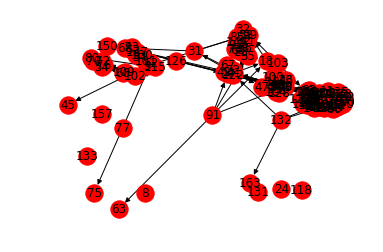

In [167]:
plt.subplot()
nx.draw(graphs[0], with_labels=True)